# Plot for comparing spread

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("..")
#import os
from utils.model import Net_mask
#from utils.data import Data
#from utils.loss_experiment import Loss
#from scripts.parameters import get_parameters
import torch
#import numpy as np
import matplotlib.pyplot as plt

In [3]:
model_map = Net_mask()
posterior_weights = torch.cat([param.view(-1) for param in model_map.parameters()])
print(posterior_weights)
model_map.load_state_dict(torch.load(f'../saved_models/models_infinite_data/MAP_inf_prior_100/model_weights.pth'))
posterior_weights = torch.cat([param.view(-1) for param in model_map.parameters()])
print(posterior_weights)

tensor([-0.1377, -0.1562, -0.0730,  ...,  0.0675, -0.0133,  0.0612],
       grad_fn=<CatBackward0>)
tensor([ 0.0947,  0.1596,  0.1387,  ..., -0.0699,  0.1274,  0.2083],
       grad_fn=<CatBackward0>)


In [4]:
def plot_comp_spread(num, n_points):
    tensor_raw = torch.load('../data/test_observations/all_test_observations.pt')[num,:].unsqueeze(0)
    post_mean = torch.load('../data/test_observations/all_test_solutions.pt')[num,:]
    n_param = 10
    input_tensor = tensor_raw[0]
    mask = input_tensor[10:]
    location_raw = torch.where(mask > 0.5)
    location = location_raw[0]
    points = tensor_raw[0][location_raw]

    # Plotting model estimates
    model = Net_mask()
    map_estimate = model_map(tensor_raw)[0].detach()

    #names = []
    sum_tensor_map = torch.zeros(n_param)

    #n_runs = 8
    plt.figure()
    #plt.plot(range(10), map_estimate, 'b')
    #plt.plot(range(10), post_mean, 'r')
    sum_tensor_bnn = torch.zeros(n_param)
    plt.subplot(1,2,1)
    #f_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
    #f_counter = 0
    #f_list = list(range(18)) + list(range(93, 100))
    #f_list = list(range(7)) + list(range(83, 100))
    #f_list = list(range(7))
    #f_length = len(f_list)
    #f_list = list(range(12)) + list(range(96, 100))
    f_list = list(range(31)) + list(range(60, 68)) + [70] + list(range(80, 85)) + list(range(92, 100))
    f_length = len(f_list)
    for f in f_list: 
        name = f'../saved_models/testing/rml/long/e4/{f}/model_weights.pth'
        model.load_state_dict(torch.load(name))
        model.eval()
        out_raw = model(tensor_raw)
        out = out_raw[0].detach()
        sum_tensor_bnn += out
        plt.plot(range(10), out, alpha=1)#, 'o')
    #plt.plot(range(10), sum_tensor_bnn/n_runs, 'r')

    plt.title('10e^4 training size')
    analytical = plt.plot(range(10), post_mean, 'b')
    #plt.plot(range(10), map_estimate, 'b')
    plt.plot(location, points, 'ko')
    plt.xlabel("x")
    plt.ylabel("y")
    #plt.legend(['Analytical', 'map'])#, 'Bagged BNN', 'MAP'])
    #plt.legend(analytical, "banalytical")
    plt.axis([-0.5, 9.5, -2.5, 2.5])

    #sum_tensor_map = torch.zeros(n_param)
    #n_runs = 100
    plt.subplot(1,2,2)
    #f_list = list(range(0, 15)) + list(range(20, 23)) + list(range(60, 62)) + [81] + list(range(96, 100))
    f_length = len(f_list)
    for f in f_list: 
        name = f'../saved_models/testing/rml/long/e5/{f}/model_weights.pth'
        model.load_state_dict(torch.load(name))
        model.eval()
        out_raw = model(tensor_raw)
        out = out_raw[0].detach()
    #    sum_tensor_map += out
        plt.plot(range(10), out, alpha=1)#, 'o')
    #plt.plot(range(10), sum_tensor_map/n_runs, 'r')

    plt.title('10e^5 training size')
    #plt.plot(range(10), map_estimate, 'b')
    analytical = plt.plot(range(10), post_mean, 'b')
    plt.plot(location, points, 'ko')
    plt.xlabel("x")
    plt.ylabel("y")
    #plt.legend(['Analytical', 'map'])#, 'Bagged BNN', 'MAP'])
    plt.axis([-0.5, 9.5, -2.5, 2.5])
    #plt.legend(analytical, "analytical")
    #plt.savefig('../figures/fig.png')
    plt.savefig(f'../figures/plot_rml_e4_rml_e5/plot_rml_e4_rml_e5_{n_points}.png')

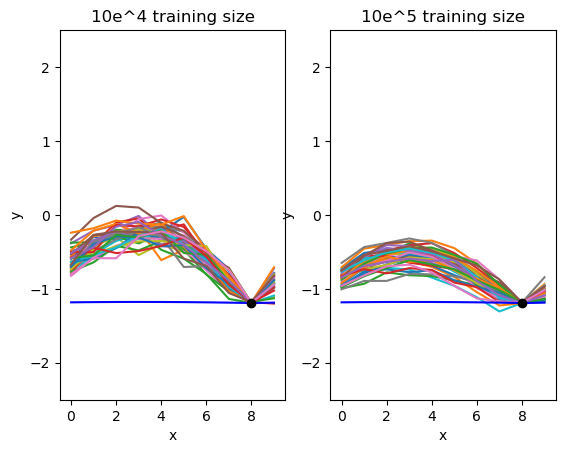

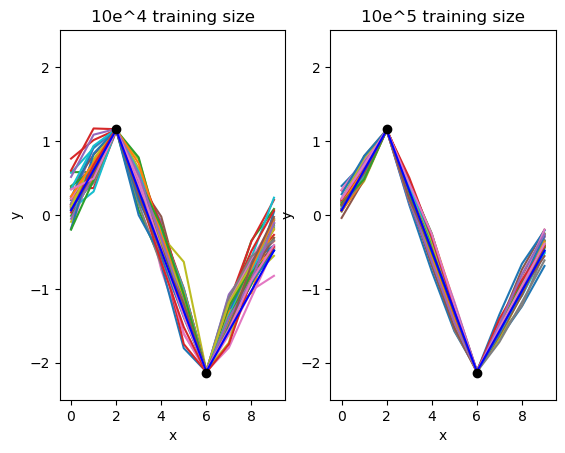

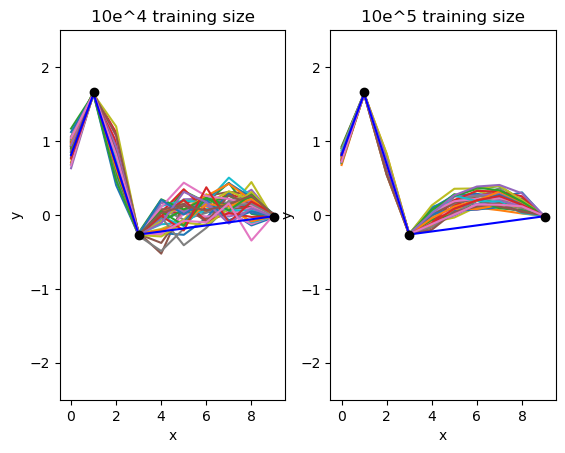

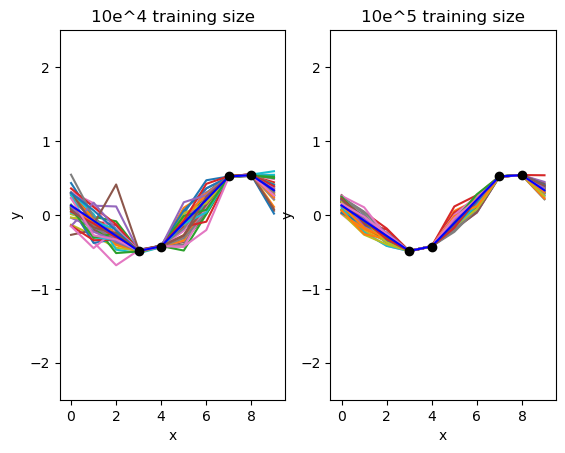

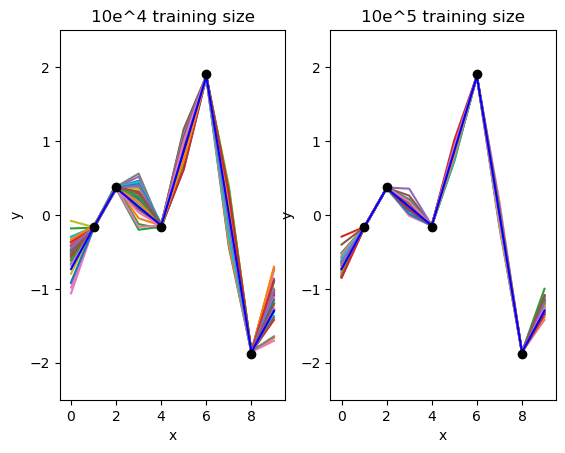

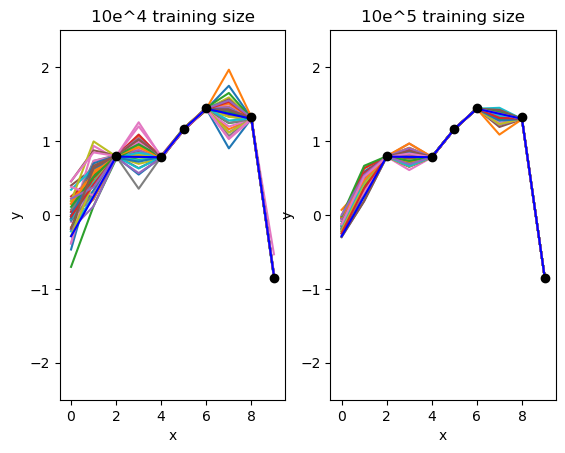

In [5]:
#n_points = 1
i = 0
#for i in range(6):
for n_points in range(1, 7):
    plot_comp_spread(int(f'{n_points}{i}'), n_points)